**About Delhivery**

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.



**The company wants to understand and process the data coming out of data engineering pipelines:**

• Clean, sanitize and manipulate data to get useful features out of raw fields

• Make sense out of the raw data and help the data science team to build forecasting models on it

**Problem statement and aditional views**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, t
from scipy.stats import binom,geom
from scipy.stats import ttest_1samp,ttest_ind,ttest_rel
from scipy.stats import chi2
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from scipy.stats import f,f_oneway
from scipy.stats import kruskal,shapiro
from scipy.stats import pearsonr, spearmanr
from scipy.stats import poisson,expon
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [2]:
df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181")
df.head(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


# **Exploratory Data Analysis**

In [3]:
#shape of the data
Rows, Columns = df.shape
print("Rows: ",Rows)
print("Columns: ",Columns)

Rows:  144867
Columns:  24


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [5]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [6]:
#dropping unknown columns/fields
df = df.drop(['is_cutoff',"route_schedule_uuid", 'cutoff_factor','cutoff_timestamp','factor','segment_factor'],axis=1)
df.head(5)

,data,trip_creation_time,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653
1,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590
2,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152
3,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224
4,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153


In [7]:
#converting to catogorical value for data and route type
df[["data","route_type"]] = df[["data","route_type"]].astype("category")

#converting into datetime
df["trip_creation_time"] = pd.to_datetime(df["trip_creation_time"])
df["od_start_time"] = pd.to_datetime(df["od_start_time"])
df["od_end_time"] = pd.to_datetime(df["od_end_time"])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  category      
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_type                      144867 non-null  category      
 3   trip_uuid                       144867 non-null  object        
 4   source_center                   144867 non-null  object        
 5   source_name                     144574 non-null  object        
 6   destination_center              144867 non-null  object        
 7   destination_name                144606 non-null  object        
 8   od_start_time                   144867 non-null  datetime64[ns]
 9   od_end_time                     144867 non-null  datetime64[ns]
 10  start_scan_to_end_scan          144867 non-null  float64

In [9]:
df.data.unique()

['training', 'test']
Categories (2, object): ['test', 'training']

In [83]:
#filtering of data based on training and test
training_data = df[df["data"]=="training"]
test_data = df[df["data"]=="test"]

In [11]:
training_rows, training_columns = training_data.shape
test_rows, test_columns = test_data.shape
print("training_data :",training_rows,"rows","and", training_columns, "columns")
print("testing_data :",test_rows,"rows","and",test_columns,"columns")
print("training data :",round((training_rows*100/Rows),2),"%")
print("testing_data  :",round((test_rows*100/Rows),2),"%")

training_data : 104858 rows and 18 columns
testing_data : 40009 rows and 18 columns
training data : 72.38 %
testing_data  : 27.62 %


**Since data science team wants to build a forecasting model on the data, data has been devided into 70% of trainng and 30% of testing data**

In [12]:
duration_data = df['od_end_time'].max() - df['trip_creation_time'].min()
print("Total duration of data is",duration_data)


Total duration of data is 26 days 03:00:07.817738


## **#null values handling**

In [13]:
#null values handling
df.isna().sum()

,0
data,0
trip_creation_time,0
route_type,0
trip_uuid,0
source_center,0
source_name,293
destination_center,0
destination_name,261
od_start_time,0
od_end_time,0


In [14]:
'''
this will show that how much % of total data has null values,
sinc 2 features has only null values we an drop those null value data(those rows)
'''
percent_null_data = round(((df.isnull().sum())*100)/len(df),2) *100
percent_null_data

,0
data,0.0
trip_creation_time,0.0
route_type,0.0
trip_uuid,0.0
source_center,0.0
source_name,20.0
destination_center,0.0
destination_name,18.0
od_start_time,0.0
od_end_time,0.0


this will show that how much % of total data has null values,
sinc 2 features has only null values we an drop those null value data(those rows)

But before droping the null data we can try to save some data by following checks:


1.   Extract the source center ID for missing source name
2.   Check those source center ID as destination center ID and check destination name is available or not.
vice varsa for destination center name

Because source center ID can be destination center ID for some packages
and source and destination center Id is unique for each source and destination name



In [15]:
source_centers = df.loc[df["source_name"].isnull(),"source_center"].unique()
source_centers

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND509103AAC', 'IND126116AAA', 'IND331022A1B',
       'IND505326AAB', 'IND852118A1B'], dtype=object)

In [16]:
destination_centers = df.loc[df["destination_name"].isnull(),"destination_center"].unique()
destination_centers

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND505326AAB', 'IND852118A1B', 'IND126116AAA',
       'IND509103AAC', 'IND221005A1A', 'IND250002AAC', 'IND331001A1C',
       'IND122015AAC'], dtype=object)

In [17]:
# checking all source_centers are present in destination_centers and destination centers are present in source center
#can not get id of either of it from both columns
print(np.all(source_centers) in source_centers)
print(np.all(source_centers) in source_centers)

True
True


**All 10 Ids are missing the center name. so it will not be much helpful for further analysis hence we can drop those rows**

In [18]:
drop_missing_data = df.dropna(axis =0, how="any", inplace = True)


In [19]:
df.isna().sum()

,0
data,0
trip_creation_time,0
route_type,0
trip_uuid,0
source_center,0
source_name,0
destination_center,0
destination_name,0
od_start_time,0
od_end_time,0


**Missing values have been handled**

In [20]:
df.describe()

,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,144316,144316,144316,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000
mean,2018-09-22 13:05:09.454117120,2018-09-22 17:32:42.435769344,2018-09-23 09:36:54.057172224,963.697698,234.708498,417.996237,214.437055,285.549785,36.175379,18.495697,22.818993
min,2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,2018-09-12 00:50:10.814399,20.000000,9.000045,9.000000,6.000000,9.008200,-244.000000,0.000000,0.000000
25%,2018-09-17 02:46:11.004421120,2018-09-17 07:37:35.014584832,2018-09-18 01:29:56.978912,161.000000,23.352027,51.000000,27.000000,29.896250,20.000000,11.000000,12.053975
50%,2018-09-22 03:36:19.186585088,2018-09-22 07:35:23.038482944,2018-09-23 02:49:00.936600064,451.000000,66.135322,132.000000,64.000000,78.624400,28.000000,17.000000,23.508300
75%,2018-09-27 17:53:19.027942912,2018-09-27 22:01:30.861209088,2018-09-28 12:13:41.675546112,1645.000000,286.919294,516.000000,259.000000,346.305400,40.000000,22.000000,27.813325
max,2018-10-03 23:59:42.701692,2018-10-06 04:27:23.392375,2018-10-08 03:00:24.353479,7898.000000,1927.447705,4532.000000,1686.000000,2326.199100,3051.000000,1611.000000,2191.403700
std,NaN,NaN,NaN,1038.082976,345.480571,598.940065,308.448543,421.717826,53.524298,14.774008,17.866367


# **Feature Creation**

In [22]:
# grouping the data on trip Unique ID , source center and destination center
merged_df = df.groupby(by = ["trip_uuid","source_center","destination_center"],
                       axis = 0,
                       as_index = False).agg({'data' : 'first',
                                              'route_type' : 'first',
                                              'trip_creation_time' : 'first',
                                              'source_name' : 'first',
                                              'destination_name' : 'last',
                                              'od_start_time' : 'first',
                                              'od_end_time' : 'last',
                                              'start_scan_to_end_scan' : 'last',
                                              'actual_distance_to_destination' : 'sum',
                                              'actual_time' : 'last',
                                              'osrm_time' : 'last',
                                              'osrm_distance' : 'last',
                                              'segment_actual_time' : 'sum',
                                              'segment_osrm_time' : 'sum',
                                              'segment_osrm_distance' : 'sum'})

<ipython-input-22-8505c7d89973>:2: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  merged_df = df.groupby(by = ["trip_uuid","source_center","destination_center"],


In [23]:
merged_df.head(5)

,trip_uuid,source_center,destination_center,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,IND209304AAA,IND000000ACB,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,3778.765471,732.0,329.0,446.5496,728.0,534.0,670.6205
1,trip-153671041653548748,IND462022AAA,IND209304AAA,training,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,5082.046634,830.0,388.0,544.8027,820.0,474.0,649.8528
2,trip-153671042288605164,IND561203AAB,IND562101AAA,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,53.310332,47.0,26.0,28.1994,46.0,26.0,28.1995
3,trip-153671042288605164,IND572101AAA,IND561203AAB,training,Carting,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,186.897974,96.0,42.0,56.9116,95.0,39.0,55.9899
4,trip-153671043369099517,IND000000ACB,IND160002AAC,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,1725.590250,611.0,212.0,281.2109,608.0,231.0,317.7408


In [24]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26222 entries, 0 to 26221
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       26222 non-null  object        
 1   source_center                   26222 non-null  object        
 2   destination_center              26222 non-null  object        
 3   data                            26222 non-null  category      
 4   route_type                      26222 non-null  category      
 5   trip_creation_time              26222 non-null  datetime64[ns]
 6   source_name                     26222 non-null  object        
 7   destination_name                26222 non-null  object        
 8   od_start_time                   26222 non-null  datetime64[ns]
 9   od_end_time                     26222 non-null  datetime64[ns]
 10  start_scan_to_end_scan          26222 non-null  float64       
 11  ac

In [25]:
#new feature creation
#merged_df['od_total_time'] = merged_df['od_end_time'] - merged_df['od_start_time'] # Will give total time for delivery
#merged_df.drop(columns = ['od_end_time', 'od_start_time'], inplace = True) # drop start and end scan time
merged_df['od_total_time(mins)'] = (merged_df['od_end_time'] - merged_df['od_start_time']).apply(lambda x : round(x.total_seconds() / 60.0)) # convert total time into minutes #merged_df['od_total_time']

In [26]:
merged_df.head(5)

,trip_uuid,source_center,destination_center,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,od_total_time(mins)
0,trip-153671041653548748,IND209304AAA,IND000000ACB,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,3778.765471,732.0,329.0,446.5496,728.0,534.0,670.6205,1261
1,trip-153671041653548748,IND462022AAA,IND209304AAA,training,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,5082.046634,830.0,388.0,544.8027,820.0,474.0,649.8528,1000
2,trip-153671042288605164,IND561203AAB,IND562101AAA,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,53.310332,47.0,26.0,28.1994,46.0,26.0,28.1995,59
3,trip-153671042288605164,IND572101AAA,IND561203AAB,training,Carting,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,186.897974,96.0,42.0,56.9116,95.0,39.0,55.9899,123
4,trip-153671043369099517,IND000000ACB,IND160002AAC,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,1725.590250,611.0,212.0,281.2109,608.0,231.0,317.7408,835


In [27]:
# grouping the data on trip unique ID
new_df = merged_df.groupby(by = ["trip_uuid"],
                       axis = 0,
                       as_index = False).agg({'data' : 'first',
                                              'route_type' : 'first',
                                              'trip_creation_time' : 'first',
                                              'source_name' : 'first',
                                              'destination_name' : 'last',
                                              'od_total_time(mins)' : 'last',
                                              'start_scan_to_end_scan' : 'last',
                                              'actual_distance_to_destination' : 'last',
                                              'actual_time' : 'last',
                                              'osrm_time' : 'last',
                                              'osrm_distance' : 'last',
                                              'segment_actual_time' : 'sum',
                                              'segment_osrm_time' : 'sum',
                                              'segment_osrm_distance' : 'sum'})

<ipython-input-27-873bf041ab84>:2: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  new_df = merged_df.groupby(by = ["trip_uuid"],


In [28]:
new_df.head(5 )

,trip_uuid,data,route_type,trip_creation_time,source_name,destination_name,od_total_time(mins),start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),1000,999.0,5082.046634,830.0,388.0,544.8027,1548.0,1008.0,1320.4733
1,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),123,122.0,186.897974,96.0,42.0,56.9116,141.0,65.0,84.1894
2,trip-153671043369099517,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),3100,3099.0,66437.911988,2736.0,1528.0,2072.8556,3308.0,1941.0,2545.2678
3,trip-153671046011330457,training,Carting,2018-09-12 00:01:00.113710,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),100,100.0,28.529648,59.0,15.0,19.6800,59.0,16.0,19.8766
4,trip-153671052974046625,training,FTL,2018-09-12 00:02:09.740725,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),81,80.0,48.941666,63.0,27.0,29.5696,340.0,115.0,146.7919


** New feature extraction from source and destination name:**


1.   source state
2.   destination state
3.  source city
4.  destination city








In [29]:
#function to extract the state name
def state(state):
  s = state.split("(")[1].split(")")[0]
  return s

In [30]:
new_df['source_state'] = new_df['source_name'].apply(state)
new_df['source_state'].unique()

array(['Uttar Pradesh', 'Karnataka', 'Haryana', 'Maharashtra',
       'Tamil Nadu', 'Gujarat', 'Delhi', 'Telangana', 'Rajasthan',
       'Assam', 'Madhya Pradesh', 'West Bengal', 'Andhra Pradesh',
       'Punjab', 'Chandigarh', 'Goa', 'Jharkhand', 'Pondicherry',
       'Orissa', 'Uttarakhand', 'Himachal Pradesh', 'Kerala',
       'Arunachal Pradesh', 'Bihar', 'Chhattisgarh',
       'Dadra and Nagar Haveli', 'Jammu & Kashmir', 'Mizoram', 'Nagaland'],
      dtype=object)

In [31]:
new_df["destination_state"] = new_df["destination_name"].apply(state)
new_df["destination_state"].unique()

array(['Uttar Pradesh', 'Karnataka', 'Haryana', 'Maharashtra',
       'Tamil Nadu', 'Gujarat', 'Delhi', 'Telangana', 'Rajasthan',
       'Madhya Pradesh', 'Assam', 'West Bengal', 'Andhra Pradesh',
       'Punjab', 'Chandigarh', 'Dadra and Nagar Haveli', 'Orissa',
       'Bihar', 'Jharkhand', 'Goa', 'Uttarakhand', 'Himachal Pradesh',
       'Kerala', 'Arunachal Pradesh', 'Mizoram', 'Chhattisgarh',
       'Jammu & Kashmir', 'Nagaland', 'Meghalaya', 'Tripura',
       'Daman & Diu'], dtype=object)

In [32]:
new_df

,trip_uuid,data,route_type,trip_creation_time,source_name,destination_name,od_total_time(mins),start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,source_state,destination_state
0,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),1000,999.0,5082.046634,830.0,388.0,544.8027,1548.0,1008.0,1320.4733,Uttar Pradesh,Uttar Pradesh
1,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),123,122.0,186.897974,96.0,42.0,56.9116,141.0,65.0,84.1894,Karnataka,Karnataka
2,trip-153671043369099517,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),3100,3099.0,66437.911988,2736.0,1528.0,2072.8556,3308.0,1941.0,2545.2678,Haryana,Haryana
3,trip-153671046011330457,training,Carting,2018-09-12 00:01:00.113710,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),100,100.0,28.529648,59.0,15.0,19.6800,59.0,16.0,19.8766,Maharashtra,Maharashtra
4,trip-153671052974046625,training,FTL,2018-09-12 00:02:09.740725,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),81,80.0,48.941666,63.0,27.0,29.5696,340.0,115.0,146.7919,Karnataka,Karnataka
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,test,Carting,2018-10-03 23:55:56.258533,Chandigarh_Mehmdpur_H (Punjab),Chandigarh_Mehmdpur_H (Punjab),105,105.0,86.944626,49.0,34.0,44.5639,82.0,62.0,64.8551,Punjab,Punjab
14783,trip-153861104386292051,test,Carting,2018-10-03 23:57:23.863155,FBD_Balabhgarh_DPC (Haryana),Faridabad_Blbgarh_DC (Haryana),61,60.0,25.130640,21.0,12.0,16.0882,21.0,11.0,16.0883,Haryana,Haryana
14784,trip-153861106442901555,test,Carting,2018-10-03 23:57:44.429324,Kanpur_GovndNgr_DC (Uttar Pradesh),Kanpur_GovndNgr_DC (Uttar Pradesh),174,173.0,47.121991,92.0,24.0,28.8492,281.0,88.0,104.8866,Uttar Pradesh,Uttar Pradesh
14785,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,Tirunelveli_VdkkuSrt_I (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),44,44.0,21.672374,30.0,14.0,16.0185,258.0,221.0,223.5324,Tamil Nadu,Tamil Nadu


In [33]:
cities = new_df["source_name"].str.split().str[0].str.split('_').str[0].unique()
#cities

In [34]:
city = []
for i in cities:
  if len(i) > 3:
    pass
  else:
    city.append(i)

In [35]:
city

['HBR',
 'FBD',
 'CCU',
 'Goa',
 'MAA',
 'BOM',
 'Pen',
 'AMD',
 'BLR',
 'PNQ',
 'OK',
 'Del',
 'GZB',
 'Hyd',
 'Wai',
 'GGN',
 'Cjb',
 'Amd',
 'Blr',
 'Mau']

In [36]:
#function to convert cities with 3 letter short code name
def city(city):
  c = city.split()[0].split('_')[0]
  if 'CCU' in city:
    return 'Kolkata'
  elif 'MAA' in city.upper():
    return 'Chennai'
  elif ('HBR' in city.upper()) or ('BLR' in city.upper()):
    return 'Bengaluru'
  elif 'FBD' in city.upper():
    return 'Faridabad'
  elif 'BOM' in city.upper():
    return 'Mumbai'
  elif 'DEL' in city.upper():
    return 'Delhi'
  elif 'OK' in city.upper():
    return 'Delhi'
  elif 'GZB' in city.upper():
    return 'Ghaziabad'
  elif 'GGN' in city.upper():
    return 'Gurgaon'
  elif 'AMD' in city.upper():
    return 'Ahmedabad'
  elif 'CJB' in city.upper():
    return 'Coimbatore'
  elif 'HYD' in city.upper():
    return 'Hyderabad'
  elif "GOA" in city.upper():
    return "Goa"
  elif "PNQ" in city.upper():
    return "Pune"
  else:
    return c

In [37]:
#extraction of city from source and destination name
new_df["source_city"] = new_df["source_name"].apply(city)
new_df["destination_city"] = new_df["destination_name"].apply(city)
new_df["source_city"].unique()

array(['Kanpur', 'Doddablpur', 'Gurgaon', 'Mumbai', 'Bellary', 'Chennai',
       'Bengaluru', 'Surat', 'Delhi', 'Pune', 'Faridabad', 'Shirala',
       'Hyderabad', 'Thirumalagiri', 'Gulbarga', 'Jaipur', 'Allahabad',
       'Guwahati', 'Narsinghpur', 'Shrirampur', 'Madakasira', 'Sonari',
       'Dindigul', 'Jalandhar', 'Chandigarh', 'Deoli', 'Pandharpur',
       'Kolkata', 'Bhandara', 'Kurnool', 'Bhiwandi', 'Bhatinda',
       'RoopNagar', 'Bantwal', 'Lalru', 'Kadi', 'Shahdol', 'Gangakher',
       'Durgapur', 'Vapi', 'Jamjodhpur', 'Jetpur', 'Mehsana', 'Jabalpur',
       'Junagadh', 'Gundlupet', 'Mysore', 'Goa', 'Bhopal', 'Sonipat',
       'Himmatnagar', 'Jamshedpur', 'Pondicherry', 'Anand', 'Udgir',
       'Nadiad', 'Villupuram', 'Purulia', 'Bhubaneshwar', 'Bamangola',
       'Tiruppattur', 'Kotdwara', 'Medak', 'Bangalore', 'Dhrangadhra',
       'Hospet', 'Ghumarwin', 'Agra', 'Sitapur', 'Bilimora', 'SultnBthry',
       'Lucknow', 'Vellore', 'Bhuj', 'Dinhata', 'Margherita', 'Boisar',
    

In [38]:
#extraction of year,month, day, weekday
new_df['trip_creation_date'] = pd.to_datetime(new_df['trip_creation_time'].dt.date)
new_df['trip_creation_year'] = new_df['trip_creation_time'].dt.year
new_df['trip_creation_month'] = new_df['trip_creation_time'].dt.month
new_df['trip_completion_month'] = df['od_end_time'].dt.month
new_df['trip_creation_day'] = new_df['trip_creation_time'].dt.day
new_df['trip_creation_weekday'] = new_df['trip_creation_time'].dt.day_name()
new_df['trip_end_weekday'] = df['od_end_time'].dt.day_name()
new_df['trip_end_day'] = df['od_end_time'].dt.day

In [39]:
new_df.head(5)

,trip_uuid,data,route_type,trip_creation_time,source_name,destination_name,od_total_time(mins),start_scan_to_end_scan,actual_distance_to_destination,actual_time,...,source_city,destination_city,trip_creation_date,trip_creation_year,trip_creation_month,trip_completion_month,trip_creation_day,trip_creation_weekday,trip_end_weekday,trip_end_day
0,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),1000,999.0,5082.046634,830.0,...,Kanpur,Kanpur,2018-09-12,2018,9,9.0,12,Wednesday,Thursday,20.0
1,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),123,122.0,186.897974,96.0,...,Doddablpur,Doddablpur,2018-09-12,2018,9,9.0,12,Wednesday,Thursday,20.0
2,trip-153671043369099517,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),3100,3099.0,66437.911988,2736.0,...,Gurgaon,Gurgaon,2018-09-12,2018,9,9.0,12,Wednesday,Thursday,20.0
3,trip-153671046011330457,training,Carting,2018-09-12 00:01:00.113710,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),100,100.0,28.529648,59.0,...,Mumbai,Mumbai,2018-09-12,2018,9,9.0,12,Wednesday,Thursday,20.0
4,trip-153671052974046625,training,FTL,2018-09-12 00:02:09.740725,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),81,80.0,48.941666,63.0,...,Bellary,Sandur,2018-09-12,2018,9,9.0,12,Wednesday,Thursday,20.0


In [40]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_trip = new_df.groupby(by = 'trip_creation_weekday')['trip_uuid'].count().reindex(cats).reset_index() # to check trip creation distribution through the weekdays
daily_trip_end = new_df.groupby(by = 'trip_end_weekday')['trip_uuid'].count().reindex(cats).reset_index() # to check trip end distribution through the weekdays

monthly_trip = new_df.groupby(by = 'trip_creation_day')['trip_uuid'].count().reset_index() # to check trip creation distribution through the month time
monthly_trip_end = new_df.groupby(by = 'trip_end_day')['trip_uuid'].count().reset_index() # to check trip end distribution through the month time

monthly_created_trip = new_df.groupby(by = 'trip_creation_month')['trip_uuid'].count().reset_index() # trips created during month
monthly_completed_trip =  new_df.groupby(by = 'trip_completion_month')['trip_uuid'].count().reset_index()

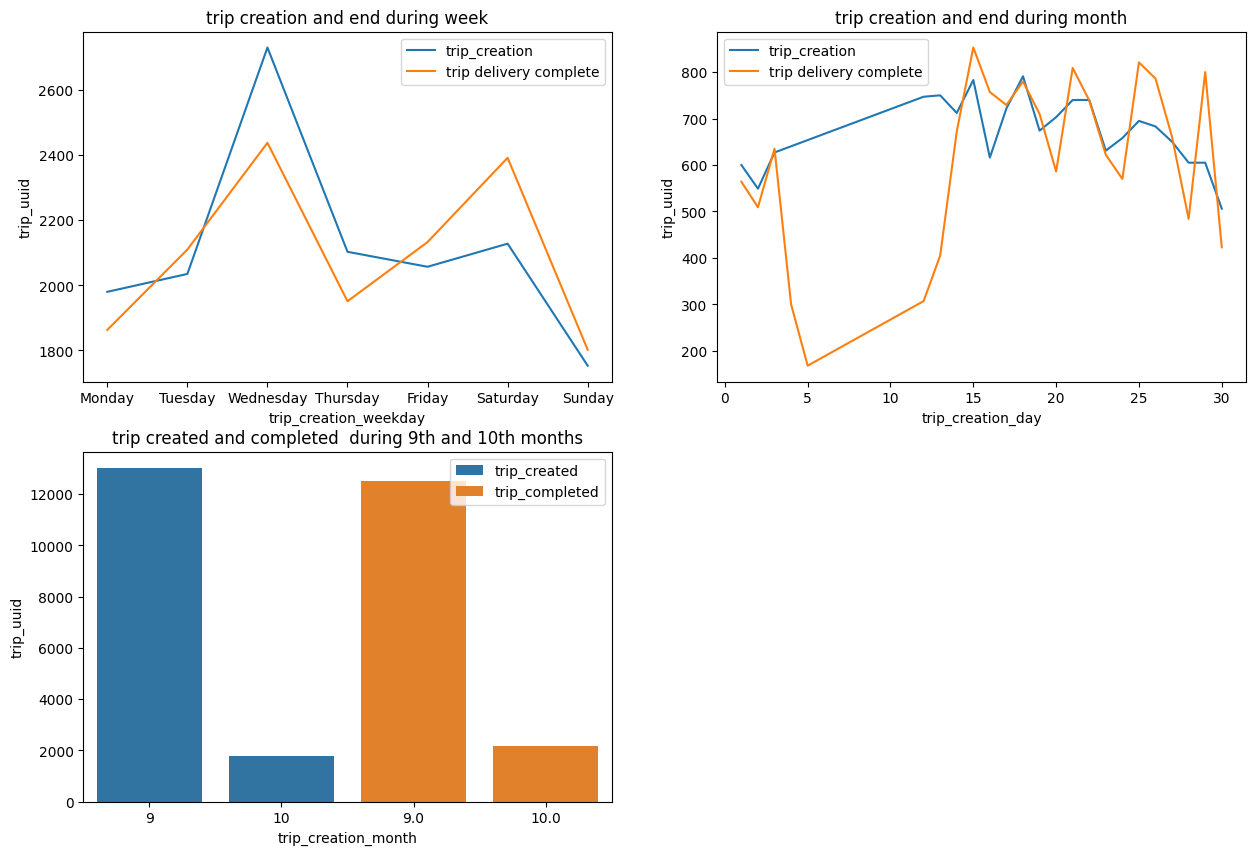

In [41]:
plt.figure(figsize = (15, 10))

plt.subplot(2,2,1)
sns.lineplot(data = daily_trip,x = daily_trip['trip_creation_weekday'],y = daily_trip['trip_uuid'], label ="trip_creation", markers=True,sort = True)
sns.lineplot(data = daily_trip_end,x = daily_trip_end['trip_end_weekday'],y = daily_trip_end['trip_uuid'], label = "trip delivery complete", markers=True,sort = True)
plt.title("trip creation and end during week")

plt.subplot(2,2,2)
sns.lineplot(data = monthly_trip,x = monthly_trip['trip_creation_day'],y = monthly_trip['trip_uuid'], label ="trip_creation", markers=True,sort = True)
sns.lineplot(data = monthly_trip_end,x = monthly_trip_end['trip_end_day'],y = monthly_trip_end['trip_uuid'], label = "trip delivery complete", markers=True,sort = True)
plt.title("trip creation and end during month")

plt.subplot(2,2,3)
sns.barplot(data = monthly_created_trip,x = monthly_created_trip["trip_creation_month"],y = monthly_created_trip['trip_uuid'],label = "trip_created")
sns.barplot(data = monthly_completed_trip, x =monthly_completed_trip["trip_completion_month"], y = monthly_completed_trip["trip_uuid"], label = "trip_completed" )
plt.title("trip created and completed  during 9th and 10th months")
plt.show()



1.   Highest number of trip cretion is being done on wednesday and highest number of trip completion is being done on wednesday and saturday
2.   Highest number of trip cretion and trip complete is being done during mid month and start decresing after that. Very low trip completion during 2nd week of month
3.   Highest number of trips are created and completed in 9th month



In [42]:
trip_route = new_df.groupby(by = 'route_type')['trip_uuid'].count().reset_index()
trip_data = new_df.groupby(by = "data")['trip_uuid'].count().reset_index()


<ipython-input-42-ccd221277853>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trip_route = new_df.groupby(by = 'route_type')['trip_uuid'].count().reset_index()
<ipython-input-42-ccd221277853>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trip_data = new_df.groupby(by = "data")['trip_uuid'].count().reset_index()


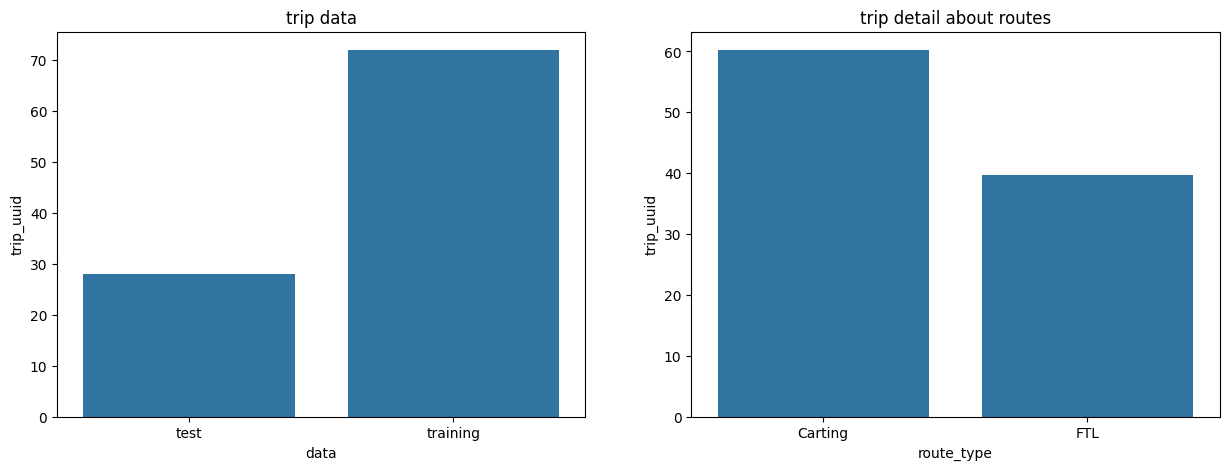

In [43]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.barplot(data = trip_data,x = trip_data["data"],y = (trip_data['trip_uuid'] * 100/ trip_data['trip_uuid'].sum()))
plt.title("trip data")

plt.subplot(1,2,2)
sns.barplot(data = trip_route,x = trip_route["route_type"],y = (trip_route['trip_uuid'] * 100/ trip_route['trip_uuid'].sum()))
plt.title("trip detail about routes")
plt.show()


*   70% data is training data set
*   60 % trips are made through carting route




In [44]:
new_df.head(5)

,trip_uuid,data,route_type,trip_creation_time,source_name,destination_name,od_total_time(mins),start_scan_to_end_scan,actual_distance_to_destination,actual_time,...,source_city,destination_city,trip_creation_date,trip_creation_year,trip_creation_month,trip_completion_month,trip_creation_day,trip_creation_weekday,trip_end_weekday,trip_end_day
0,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),1000,999.0,5082.046634,830.0,...,Kanpur,Kanpur,2018-09-12,2018,9,9.0,12,Wednesday,Thursday,20.0
1,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),123,122.0,186.897974,96.0,...,Doddablpur,Doddablpur,2018-09-12,2018,9,9.0,12,Wednesday,Thursday,20.0
2,trip-153671043369099517,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),3100,3099.0,66437.911988,2736.0,...,Gurgaon,Gurgaon,2018-09-12,2018,9,9.0,12,Wednesday,Thursday,20.0
3,trip-153671046011330457,training,Carting,2018-09-12 00:01:00.113710,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),100,100.0,28.529648,59.0,...,Mumbai,Mumbai,2018-09-12,2018,9,9.0,12,Wednesday,Thursday,20.0
4,trip-153671052974046625,training,FTL,2018-09-12 00:02:09.740725,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),81,80.0,48.941666,63.0,...,Bellary,Sandur,2018-09-12,2018,9,9.0,12,Wednesday,Thursday,20.0


In [45]:
source_state_trip = new_df.groupby(by = 'source_state')['trip_uuid'].count().reset_index()
destination_state_trip = new_df.groupby(by = 'destination_state')['trip_uuid'].count().reset_index()
source_city_trip = new_df.groupby(by = 'source_city')['trip_uuid'].count().reset_index()
destination_city_trip = new_df.groupby(by = 'destination_city')['trip_uuid'].count().reset_index()

In [46]:
#data extraction for city wise trip creation devilvery
source_destination_city_trip = pd.merge(source_city_trip, destination_city_trip, how="outer", left_on="source_city", right_on="destination_city", left_index=False, right_index=False, sort=False, suffixes=('_source', '_destination'), copy=False)
source_destination_city_trip = source_destination_city_trip.rename({"source_city": "city","trip_uuid_source":"source_trip","trip_uuid_destination":"destination_trip"},axis =1)
source_destination_city_trip = source_destination_city_trip[["city","source_trip","destination_trip"]]

# Melt the dataframe to reshape it for Seaborn's barplot
city_source_destination_trip = source_destination_city_trip.melt(id_vars="city", value_vars=["source_trip", "destination_trip"],
                                          var_name="trip_type", value_name="total_city_trips")

In [47]:
total_city_trip = city_source_destination_trip.groupby(by="city")["total_city_trips"].sum()
total_city_trip = total_city_trip.sort_values(ascending = False)

total_city_trip["Bengaluru"] = total_city_trip["Bengaluru"] + total_city_trip["Bangalore"]
total_city_trip = total_city_trip.head(10).drop("Bangalore")
total_city_trip

,total_city_trips
city,
Mumbai,2990.0
Gurgaon,2090.0
Bengaluru,2899.0
Delhi,1663.0
Chennai,1163.0
Bhiwandi,1131.0
Hyderabad,1027.0
Pune,981.0
Kolkata,740.0


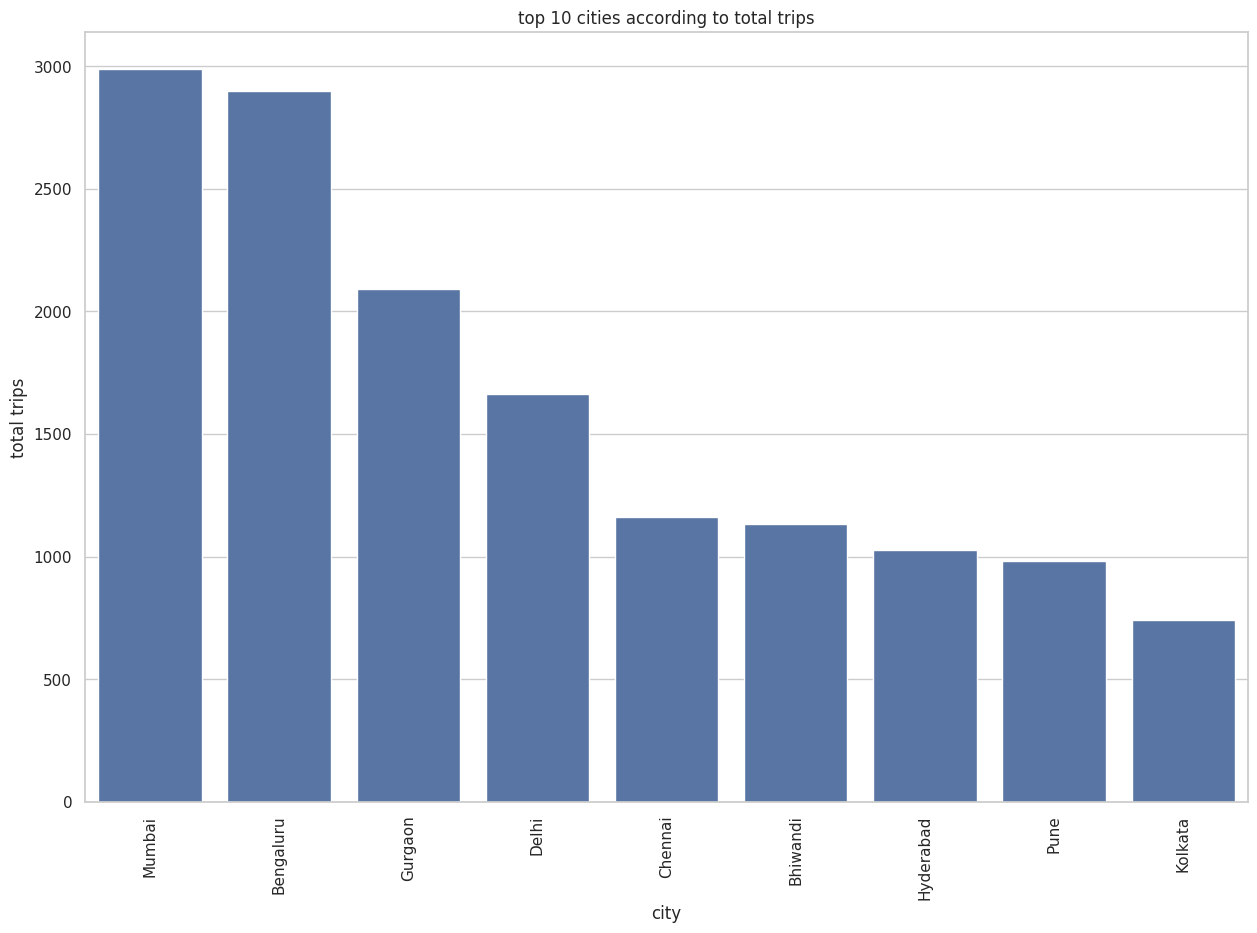

In [48]:
#barplot for top 10 cities according to total trips
plt.figure(figsize = (15, 10))
sns.set(style="whitegrid")

sorted_values = total_city_trip.sort_values(ascending = False).index

# Create a bar chart with state on the x-axis and the count on the y-axis
barplot = sns.barplot(x="city", y="total_city_trips", data=total_city_trip.reset_index(), order=sorted_values)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Add a title and labels for the axes
plt.title("top 10 cities according to total trips")
plt.xlabel("city")
plt.ylabel("total trips")


plt.show()


*   Based on the above graph Mumbai, Bengaluru and Gurgaon do the highest number of trip creation and trip delivery.





In [49]:
#data extraction for state wise trip creation devilvery
source_destination_state_trip = pd.merge(source_state_trip, destination_state_trip, how="outer", left_on="source_state", right_on="destination_state", left_index=False, right_index=False, sort=False, suffixes=('_source', '_destination'), copy=False)
source_destination_state_trip = source_destination_state_trip.rename({"source_state": "state","trip_uuid_source":"source_trip","trip_uuid_destination":"destination_trip"},axis =1)
source_destination_state_trip = source_destination_state_trip[["state","source_trip","destination_trip"]]

# Melt the dataframe to reshape it for Seaborn's barplot
state_source_destination_trip = source_destination_state_trip.melt(id_vars="state", value_vars=["source_trip", "destination_trip"],
                                          var_name="trip_type", value_name="total_state_trips")

In [50]:
total_state_trip = state_source_destination_trip.groupby(by="state")["total_state_trips"].sum()
total_state_trip.reset_index()

,state,total_state_trips
0,Andhra Pradesh,877.0
1,Arunachal Pradesh,29.0
2,Assam,500.0
3,Bihar,718.0
4,Chandigarh,158.0
5,Chhattisgarh,86.0
6,Dadra and Nagar Haveli,32.0
7,Delhi,1382.0
8,Goa,117.0
9,Gujarat,1484.0


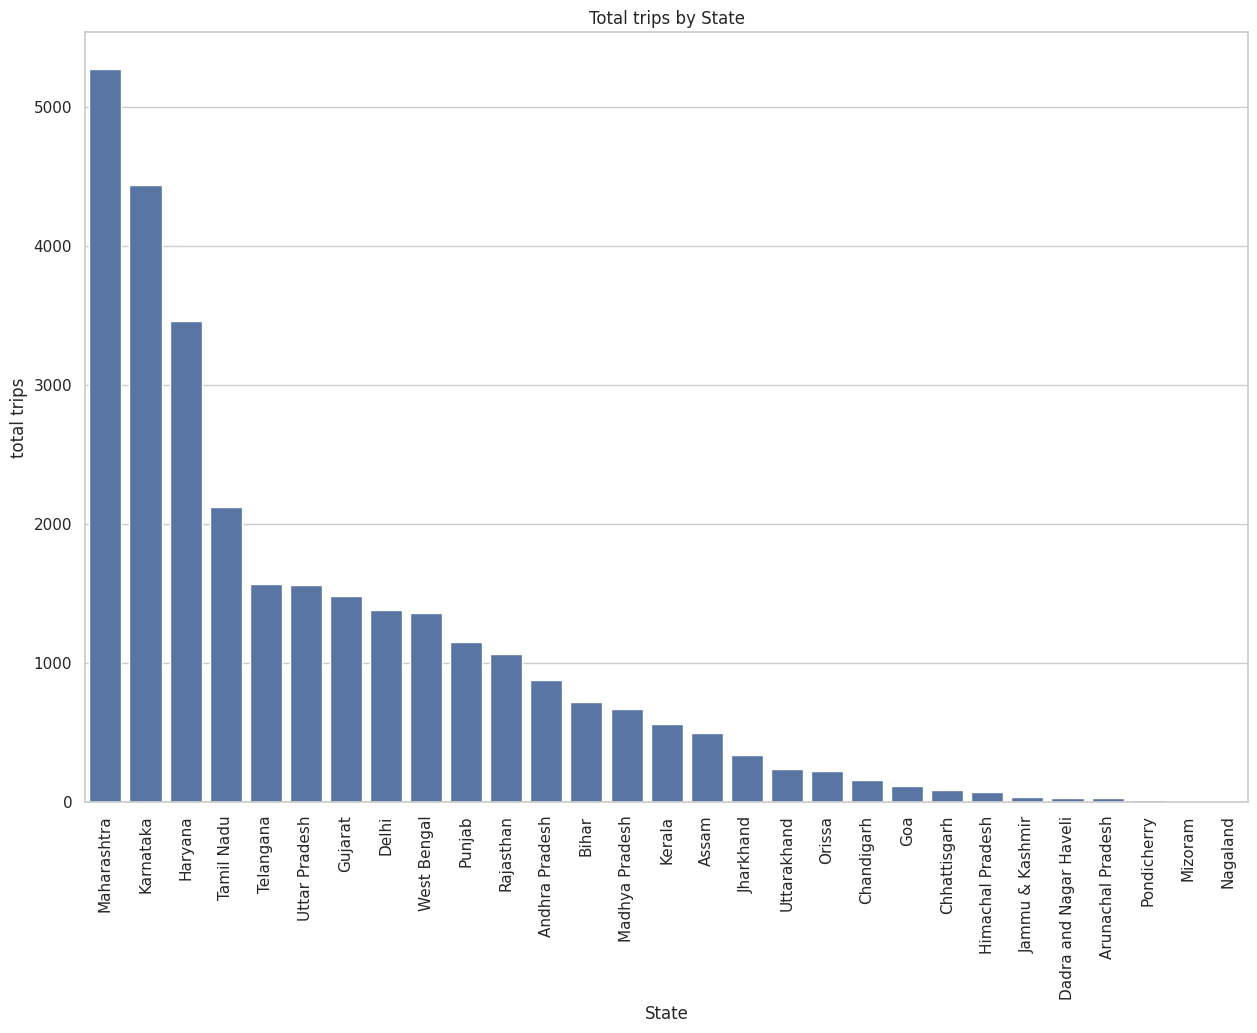

In [51]:
#barplot for state wise total trips
plt.figure(figsize = (15, 10))
sns.set(style="whitegrid")

sorted_values = total_state_trip.sort_values(ascending = False).index

# Create a bar chart with state on the x-axis and the count on the y-axis
barplot = sns.barplot(x="state", y="total_state_trips", data=total_state_trip.reset_index(), order=sorted_values)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Add a title and labels for the axes
plt.title("Total trips by State")
plt.xlabel("State")
plt.ylabel("total trips")


plt.show()



*   Based on the above graph Maharashtra, Karnataka and Haryana do the highest number of trip creation and trip delivery.





In [53]:
new_df.columns

Index(['trip_uuid', 'data', 'route_type', 'trip_creation_time', 'source_name',
       'destination_name', 'od_total_time(mins)', 'start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'source_state', 'destination_state',
       'source_city', 'destination_city', 'trip_creation_date',
       'trip_creation_year', 'trip_creation_month', 'trip_completion_month',
       'trip_creation_day', 'trip_creation_weekday', 'trip_end_weekday',
       'trip_end_day'],
      dtype='object')

In [52]:
new_df.head(5)

,trip_uuid,data,route_type,trip_creation_time,source_name,destination_name,od_total_time(mins),start_scan_to_end_scan,actual_distance_to_destination,actual_time,...,source_city,destination_city,trip_creation_date,trip_creation_year,trip_creation_month,trip_completion_month,trip_creation_day,trip_creation_weekday,trip_end_weekday,trip_end_day
0,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),1000,999.0,5082.046634,830.0,...,Kanpur,Kanpur,2018-09-12,2018,9,9.0,12,Wednesday,Thursday,20.0
1,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),123,122.0,186.897974,96.0,...,Doddablpur,Doddablpur,2018-09-12,2018,9,9.0,12,Wednesday,Thursday,20.0
2,trip-153671043369099517,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),3100,3099.0,66437.911988,2736.0,...,Gurgaon,Gurgaon,2018-09-12,2018,9,9.0,12,Wednesday,Thursday,20.0
3,trip-153671046011330457,training,Carting,2018-09-12 00:01:00.113710,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),100,100.0,28.529648,59.0,...,Mumbai,Mumbai,2018-09-12,2018,9,9.0,12,Wednesday,Thursday,20.0
4,trip-153671052974046625,training,FTL,2018-09-12 00:02:09.740725,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),81,80.0,48.941666,63.0,...,Bellary,Sandur,2018-09-12,2018,9,9.0,12,Wednesday,Thursday,20.0


In [54]:
pairplot_columns = ['od_total_time(mins)', 'start_scan_to_end_scan','actual_distance_to_destination', 'actual_time', 'osrm_time',
                    'osrm_distance', 'segment_actual_time', 'segment_osrm_time','segment_osrm_distance']
#sns.pairplot(data = new_df, vars = pairplot_columns, kind = 'reg',hue = 'route_type', markers = '.')
#plt.show()

In [55]:
df_corr = new_df[pairplot_columns].corr()
df_corr

,od_total_time(mins),start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
od_total_time(mins),1.000000,1.000000,0.852371,0.962198,0.924495,0.924276,0.815792,0.791690,0.799721
start_scan_to_end_scan,1.000000,1.000000,0.852376,0.962201,0.924501,0.924282,0.815794,0.791695,0.799726
actual_distance_to_destination,0.852371,0.852376,1.000000,0.897052,0.943327,0.944930,0.724263,0.768382,0.775999
actual_time,0.962198,0.962201,0.897052,1.000000,0.958163,0.958379,0.842318,0.813562,0.821564
osrm_time,0.924495,0.924501,0.943327,0.958163,1.000000,0.998958,0.811099,0.849650,0.854323
osrm_distance,0.924276,0.924282,0.944930,0.958379,0.998958,1.000000,0.811711,0.848869,0.855440
segment_actual_time,0.815792,0.815794,0.724263,0.842318,0.811099,0.811711,1.000000,0.953214,0.956293
segment_osrm_time,0.791690,0.791695,0.768382,0.813562,0.849650,0.848869,0.953214,1.000000,0.996098
segment_osrm_distance,0.799721,0.799726,0.775999,0.821564,0.854323,0.855440,0.956293,0.996098,1.000000


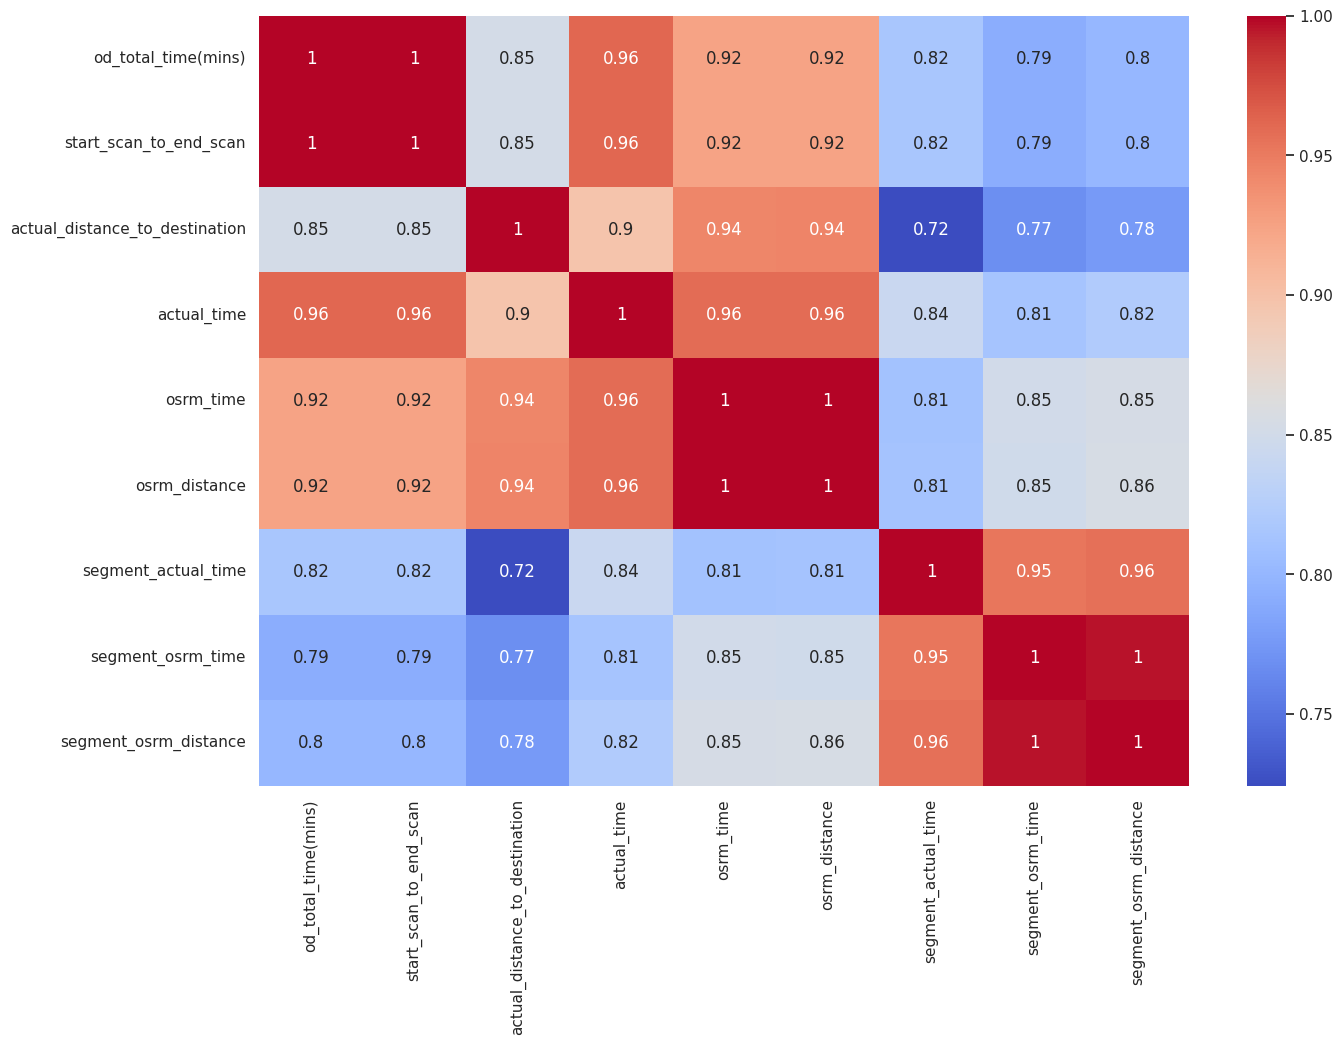

In [56]:
plt.figure(figsize = (15, 10))
sns.heatmap(data = df_corr, annot = True, cmap="coolwarm")
plt.show()



*   All correlation values are between 0.7 to 1 hence all columns shows a correlation but columns with correlation value 1 shows a strong correlation



 ## **In-depth analysis and feature engineering**

##*   Calculate the time taken between od_start_time and od_end_time and keep it as a feature. Drop the original columns, if required
##*   Compare the difference between Point a. and start_scan_to_end_scan. Do hypothesis testing/ Visual analysis to check.



In [57]:
time_taken = new_df[["trip_uuid", "od_total_time(mins)","start_scan_to_end_scan"]]
time_taken

,trip_uuid,od_total_time(mins),start_scan_to_end_scan
0,trip-153671041653548748,1000,999.0
1,trip-153671042288605164,123,122.0
2,trip-153671043369099517,3100,3099.0
3,trip-153671046011330457,100,100.0
4,trip-153671052974046625,81,80.0
...,...,...,...
14782,trip-153861095625827784,105,105.0
14783,trip-153861104386292051,61,60.0
14784,trip-153861106442901555,174,173.0
14785,trip-153861115439069069,44,44.0


**visual analysis**


1.   Box plot:  to visualize the distribution of the two variables and to detect any significant differences or outliers.
2.   Histogram: to show the distribution shapes and to identify whether the data is normally distributed or not
3.   Scatter plot: to see the relationship between two variables



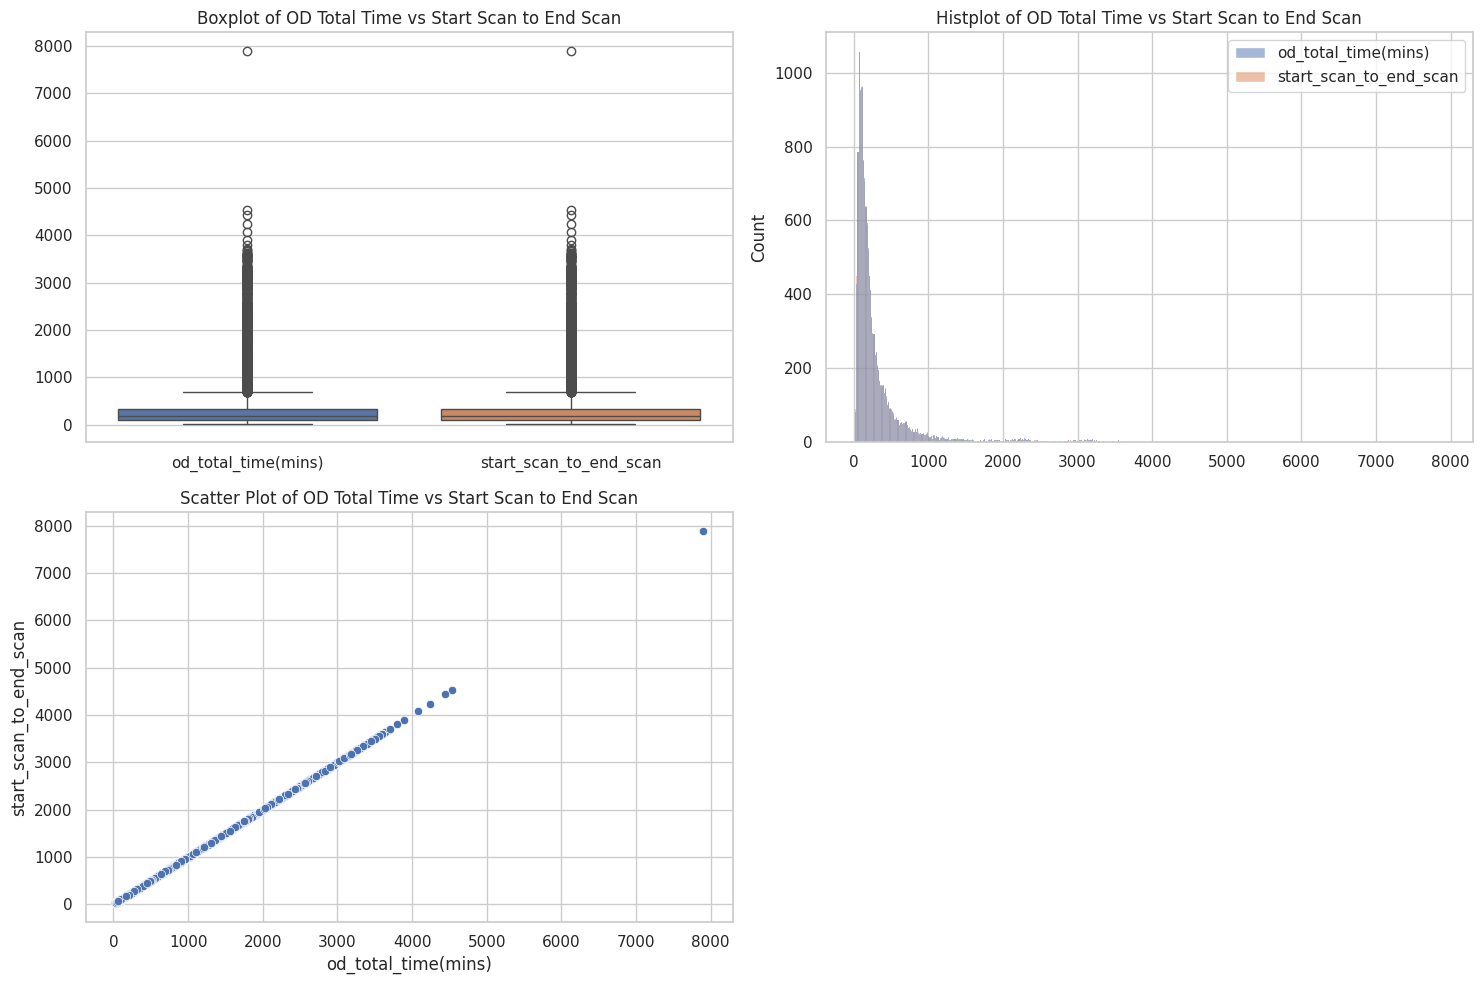

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(15, 10))

# Boxplot
plt.subplot(2, 2, 1)
sns.boxplot(data=time_taken) #x="od_total_time(mins)", y="start_scan_to_end_scan")
plt.title('Boxplot of OD Total Time vs Start Scan to End Scan')

# Histogram
plt.subplot(2, 2, 2)
sns.histplot(data=time_taken)#, x="od_total_time(mins)", y="start_scan_to_end_scan", cbar=True)
plt.title('Histplot of OD Total Time vs Start Scan to End Scan')

# Scatter Plot
plt.subplot(2, 2, 3)
sns.scatterplot(data=time_taken, x="od_total_time(mins)", y="start_scan_to_end_scan")
plt.title('Scatter Plot of OD Total Time vs Start Scan to End Scan')

# Display the plots
plt.tight_layout()
plt.show()



*   **based on histogram both variable does not follow normal distribution**
*   **outliers are present in both variables**

In [59]:
#Levene’s Test for Homogeneity of Variances

H0 = "The variances across the groups are equal." #Null Hypothesis
H1 = "The variances across the groups are not equal." #Alternative Hypothesis
confidence = 0.95
alfa = 0.05
from scipy.stats import levene

statistic_value, p_value = levene(time_taken["od_total_time(mins)"], time_taken["start_scan_to_end_scan"])
print(f"Levene's Test: Statistic = {statistic_value}, p-value = {p_value}")

if p_value <alfa:
 print(Ha)
else:
 print(H0)

Levene's Test: Statistic = 2.9409497054352514e-07, p-value = 0.9995673067810471
The variances across the groups are equal.


**Variances across the variables are equal but it is not normally distributed hence we will perform non-paramatric Mann-Whitney U Test**

In [60]:
#hypothesis testing for total time taken and expected start_scan_to_end_scan
Ho = "There is no difference between total time taken and expected start_scan_to_end_scan " # null hypothesis
Ha = "There is a difference between total time taken and expected start_scan_to_end_scan " #alternate hypothesis

confidence = 0.95
alfa = 0.05
from scipy.stats import mannwhitneyu
statistic_value,p_value=mannwhitneyu(time_taken["od_total_time(mins)"], time_taken["start_scan_to_end_scan"], alternative='two-sided')
print("t_statistic :",statistic_value)
print("p_value :",p_value)
if p_value <alfa:
 print(Ha)
else:
 print(Ho)


t_statistic : 109589340.0
p_value : 0.7215156248063554
Thesre is no difference between total time taken and expected start_scan_to_end_scan 


**Statistically od_total_time and start_scan_to_end_scan are similar.**

##**Hypothesis testing/ visual analysis between actual_time aggregated value and OSRM time aggregated value**

In [61]:
actual_osrm = new_df[["trip_uuid","actual_time","osrm_time"]]
actual_osrm

,trip_uuid,actual_time,osrm_time
0,trip-153671041653548748,830.0,388.0
1,trip-153671042288605164,96.0,42.0
2,trip-153671043369099517,2736.0,1528.0
3,trip-153671046011330457,59.0,15.0
4,trip-153671052974046625,63.0,27.0
...,...,...,...
14782,trip-153861095625827784,49.0,34.0
14783,trip-153861104386292051,21.0,12.0
14784,trip-153861106442901555,92.0,24.0
14785,trip-153861115439069069,30.0,14.0


**visual analysis**

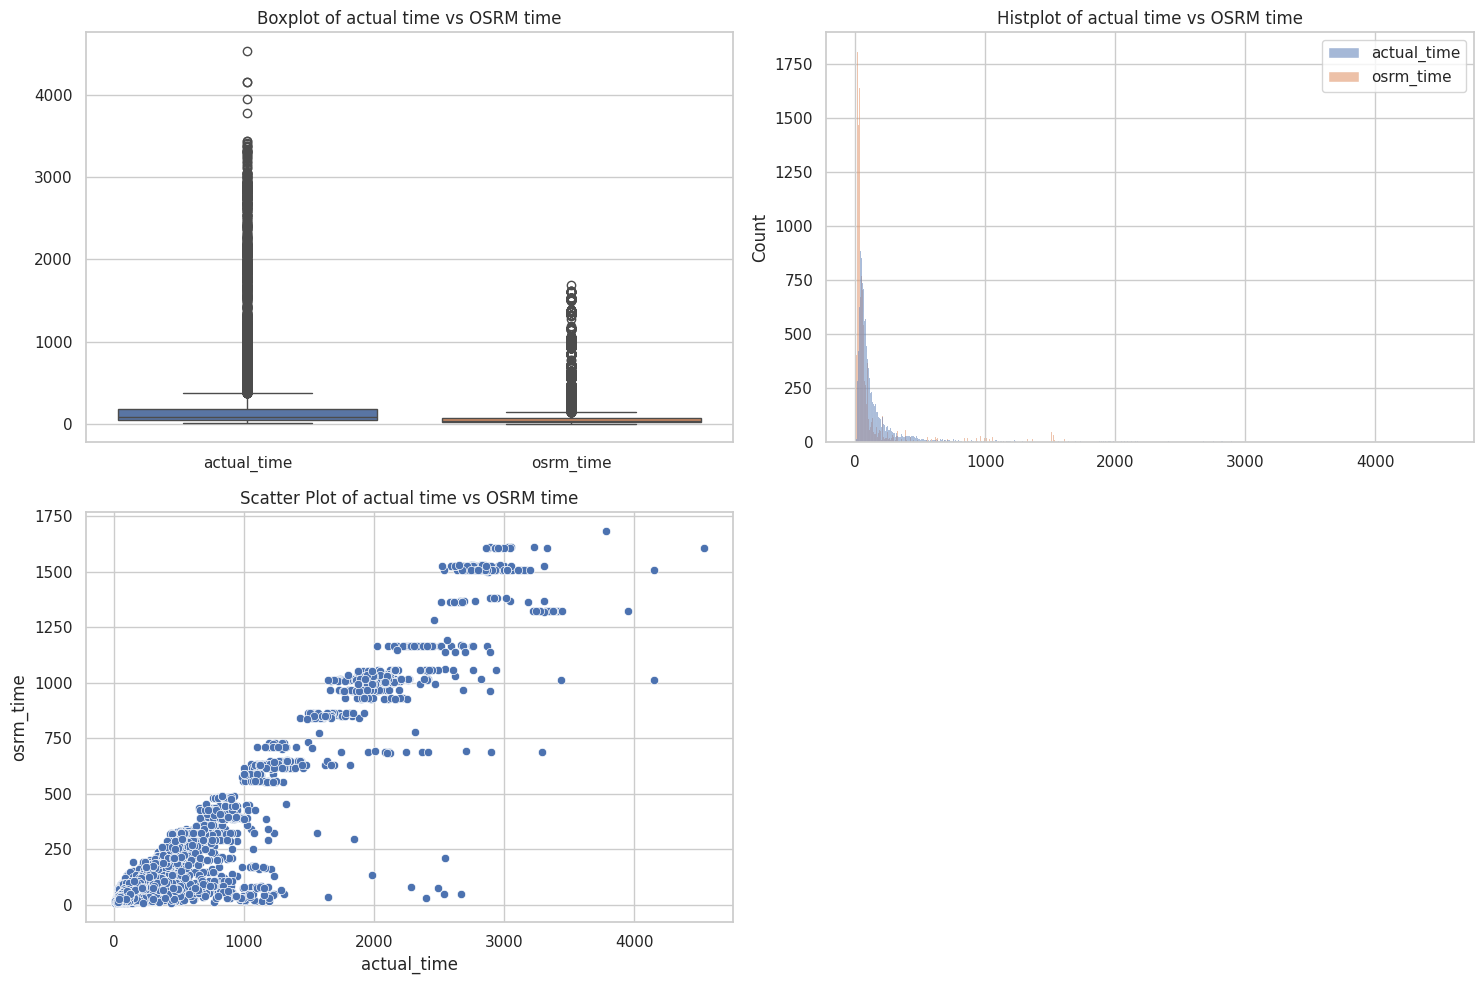

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(15, 10))

# Boxplot
plt.subplot(2, 2, 1)
sns.boxplot(data=actual_osrm)
plt.title('Boxplot of actual time vs OSRM time')

# Histogram
plt.subplot(2, 2, 2)
sns.histplot(data=actual_osrm)
plt.title('Histplot of actual time vs OSRM time')

# Scatter Plot
plt.subplot(2, 2, 3)
sns.scatterplot(data=actual_osrm, x="actual_time", y="osrm_time")
plt.title('Scatter Plot of actual time vs OSRM time')

# Display the plots
plt.tight_layout()
plt.show()

*   **based on histogram both variable does not follow normal distribution**
*   **outliers are present in both variables**



In [63]:
#Levene’s Test for Homogeneity of Variances

H0 = "The variances across the actual time and osrm time are equal." #Null Hypothesis
Ha = "The variances across the actual time and osrm time are not equal." #Alternative Hypothesis
confidence = 0.95
alfa = 0.05
from scipy.stats import levene

statistic_value, p_value = levene(actual_osrm["actual_time"], actual_osrm["osrm_time"])
print(f"Levene's Test: Statistic = {statistic_value}, p-value = {p_value}")

if p_value <alfa:
 print(Ha)
else:
 print(H0)

Levene's Test: Statistic = 615.4847491495041, p-value = 1.7065702203571972e-134
The variances across the actual time and osrm time are not equal.


**homogenity of Variances and normality of data assumptions are not satisfied hence we will perform non-paramatric Mann-Whitney U Test**

In [64]:
#hypothesis testing for actual time and OSRM time
Ho = "Thesre is no difference between actual time and OSRM time" # null hypothesis
Ha = "There is a difference between actual time and OSRM time " #alternate hypothesis

confidence = 0.95
alfa = 0.05

from scipy.stats import mannwhitneyu
statistic_value,p_value=mannwhitneyu(actual_osrm["actual_time"], actual_osrm["osrm_time"], alternative='two-sided')
print("t_statistic :",statistic_value)
print("p_value :",p_value)
if p_value <alfa:
 print(Ha)
else:
 print(Ho)


t_statistic : 162076565.0
p_value : 0.0
There is a difference between actual time and OSRM time 


**Based on statistical analysis actual time and OSRM time are not same.**

##**hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value**

In [65]:
actual_segment = new_df[["trip_uuid","actual_time","segment_actual_time"]]
actual_segment

,trip_uuid,actual_time,segment_actual_time
0,trip-153671041653548748,830.0,1548.0
1,trip-153671042288605164,96.0,141.0
2,trip-153671043369099517,2736.0,3308.0
3,trip-153671046011330457,59.0,59.0
4,trip-153671052974046625,63.0,340.0
...,...,...,...
14782,trip-153861095625827784,49.0,82.0
14783,trip-153861104386292051,21.0,21.0
14784,trip-153861106442901555,92.0,281.0
14785,trip-153861115439069069,30.0,258.0


**visual analysis**

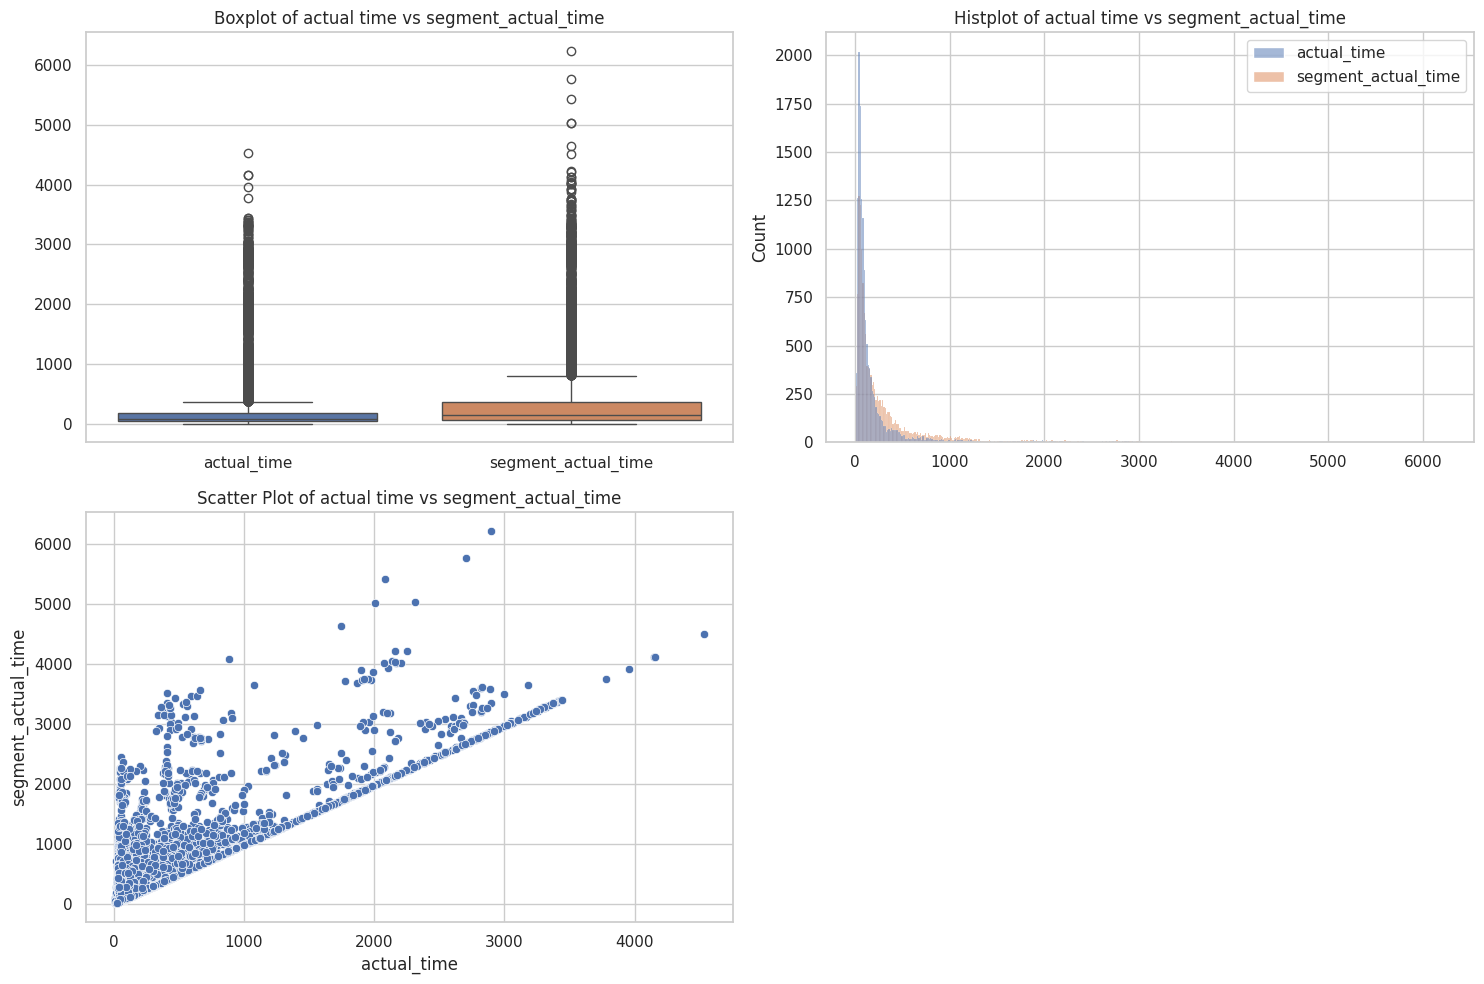

In [66]:
import matplotlib.pyplot as plt # "trip_uuid","actual_time","segment_actual_time"
import seaborn as sns

fig = plt.figure(figsize=(15, 10))

# Boxplot
plt.subplot(2, 2, 1)
sns.boxplot(data=actual_segment)
plt.title('Boxplot of actual time vs segment_actual_time')

# Histogram
plt.subplot(2, 2, 2)
sns.histplot(data=actual_segment)
plt.title('Histplot of actual time vs segment_actual_time')

# Scatter Plot
plt.subplot(2, 2, 3)
sns.scatterplot(data=actual_segment, x="actual_time", y="segment_actual_time")
plt.title('Scatter Plot of actual time vs segment_actual_time')

# Display the plots
plt.tight_layout()
plt.show()

*   **These two variables does not follow the normal distribution**
*   **outliers are present in both variables**

In [67]:
#Levene’s Test for Homogeneity of Variances

H0 = "The variances across the actual time and segment actual time are equal." #Null Hypothesis
Ha = "The variances across the actual time and segment actual time are not equal." #Alternative Hypothesis

confidence = 0.95
alfa = 0.05

from scipy.stats import levene

statistic_value, p_value = levene(actual_segment["actual_time"], actual_segment["segment_actual_time"])
print(f"Levene's Test: Statistic = {statistic_value}, p-value = {p_value}")

if p_value <alfa:
 print(Ha)
else:
 print(H0)

Levene's Test: Statistic = 363.2235493377645, p-value = 1.7012850612953372e-80
The variances across the actual time and segment actual time are not equal.


**Both variables does not follow assumptions of normality and varience of homogeneity for t-test, hence we will perform perform non-paramatric Mann-Whitney U Test**

In [68]:
#hypothesis testing for actual time and OSRM time
Ho = "Thesre is no difference between actual time and segment actual time" # null hypothesis
Ha = "There is a difference between actual time and segment actual time " #alternate hypothesis

confidence = 0.95
alfa = 0.05

from scipy.stats import mannwhitneyu
statistic_value,p_value=mannwhitneyu(actual_segment["actual_time"], actual_segment["segment_actual_time"], alternative='two-sided')
print("statistic :",statistic_value)
print("p_value :",p_value)
if p_value <alfa:
 print(Ha)
else:
 print(Ho)


statistic : 84217886.5
p_value : 2.0025997464382218e-256
There is a difference between actual time and segment actual time 


**Based on non paramatric Mann-Whitney U Test, actual time and segment actual time are not same.**

##**hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value**

In [69]:
osrm_segment = new_df[["trip_uuid","osrm_distance", "segment_osrm_distance"]]
osrm_segment

,trip_uuid,osrm_distance,segment_osrm_distance
0,trip-153671041653548748,544.8027,1320.4733
1,trip-153671042288605164,56.9116,84.1894
2,trip-153671043369099517,2072.8556,2545.2678
3,trip-153671046011330457,19.6800,19.8766
4,trip-153671052974046625,29.5696,146.7919
...,...,...,...
14782,trip-153861095625827784,44.5639,64.8551
14783,trip-153861104386292051,16.0882,16.0883
14784,trip-153861106442901555,28.8492,104.8866
14785,trip-153861115439069069,16.0185,223.5324


**visual analysis**

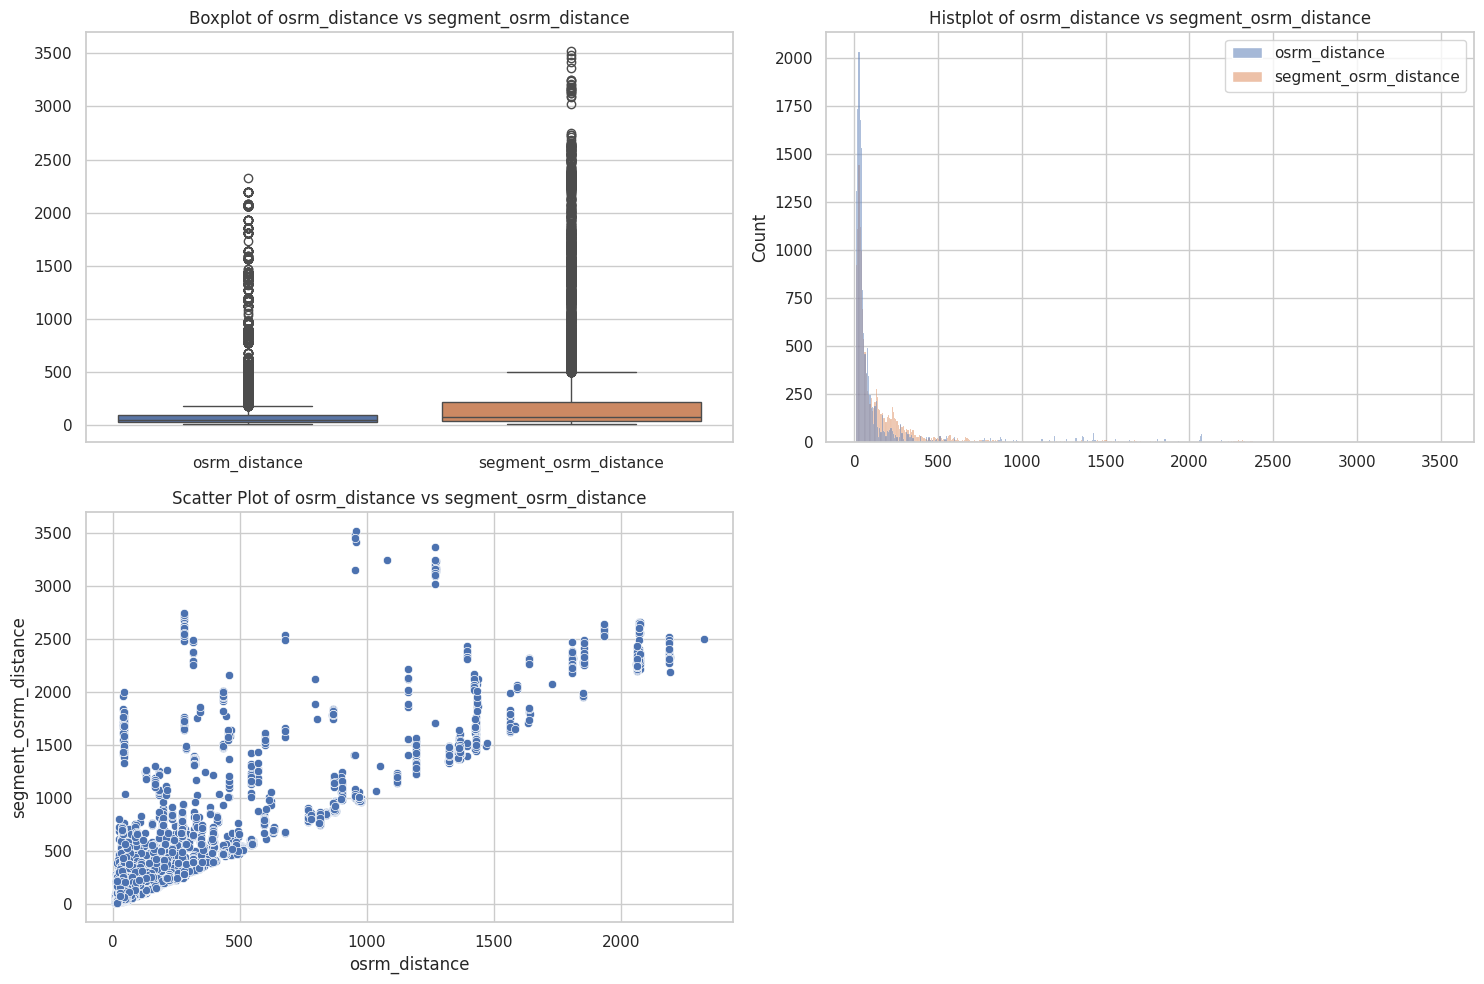

In [70]:
import matplotlib.pyplot as plt # "trip_uuid","osrm_distance", "segment_osrm_distance"
import seaborn as sns

fig = plt.figure(figsize=(15, 10))

# Boxplot
plt.subplot(2, 2, 1)
sns.boxplot(data=osrm_segment)
plt.title('Boxplot of osrm_distance vs segment_osrm_distance')

# Histogram
plt.subplot(2, 2, 2)
sns.histplot(data=osrm_segment)
plt.title('Histplot of osrm_distance vs segment_osrm_distance')

# Scatter Plot
plt.subplot(2, 2, 3)
sns.scatterplot(data=osrm_segment, x="osrm_distance", y="segment_osrm_distance")
plt.title('Scatter Plot of osrm_distance vs segment_osrm_distance')

# Display the plots
plt.tight_layout()
plt.show()

*   **These two variables does not follow the normal distribution**
*   **outliers are present in both variables**



In [71]:
#Levene’s Test for Homogeneity of Variances in "osrm_distance", "segment_osrm_distance"

H0 = "The variances across the osrm distance and segment osrm distance are equal." #Null Hypothesis
Ha = "The variances across the osrm distance and segment osrm distance are not equal." #Alternative Hypothesis

confidence = 0.95
alfa = 0.05

from scipy.stats import levene

statistic_value, p_value = levene(osrm_segment["osrm_distance"], osrm_segment["segment_osrm_distance"])
print(f"Levene's Test: Statistic = {statistic_value}, p-value = {p_value}")

if p_value <alfa:
 print(Ha)
else:
 print(H0)

Levene's Test: Statistic = 432.1415884126009, p-value = 2.6727169494145576e-95
The variances across the osrm distance and segment osrm distance are not equal.


**Both variables does not follow assumptions of normality and varience of homogeneity for t-test, hence we will perform perform non-paramatric Mann-Whitney U Test**

In [72]:
#hypothesis testing for "osrm_distance", "segment_osrm_distance"
Ho = "Thesre is no difference between osrm distance and segment osrm distance" # null hypothesis
Ha = "There is a difference between osrm distance and segment osrm distance " #alternate hypothesis

confidence = 0.95
alfa = 0.05

from scipy.stats import mannwhitneyu
statistic_value,p_value=mannwhitneyu(osrm_segment["osrm_distance"], osrm_segment["segment_osrm_distance"], alternative='two-sided')
print("statistic :",statistic_value)
print("p_value :",p_value)
if p_value <alfa:
 print(Ha)
else:
 print(Ho)


statistic : 82950404.0
p_value : 9.763204777245944e-283
There is a difference between osrm distance and segment osrm distance 


**Based on non paramatric Mann-Whitney U Test, osrm distance and segment osrm distance are not same.**

##**hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value**

In [73]:
osrm_segment_osrm_time = new_df[["trip_uuid","osrm_time", "segment_osrm_time"]]
osrm_segment_osrm_time

,trip_uuid,osrm_time,segment_osrm_time
0,trip-153671041653548748,388.0,1008.0
1,trip-153671042288605164,42.0,65.0
2,trip-153671043369099517,1528.0,1941.0
3,trip-153671046011330457,15.0,16.0
4,trip-153671052974046625,27.0,115.0
...,...,...,...
14782,trip-153861095625827784,34.0,62.0
14783,trip-153861104386292051,12.0,11.0
14784,trip-153861106442901555,24.0,88.0
14785,trip-153861115439069069,14.0,221.0


**visual analysis**

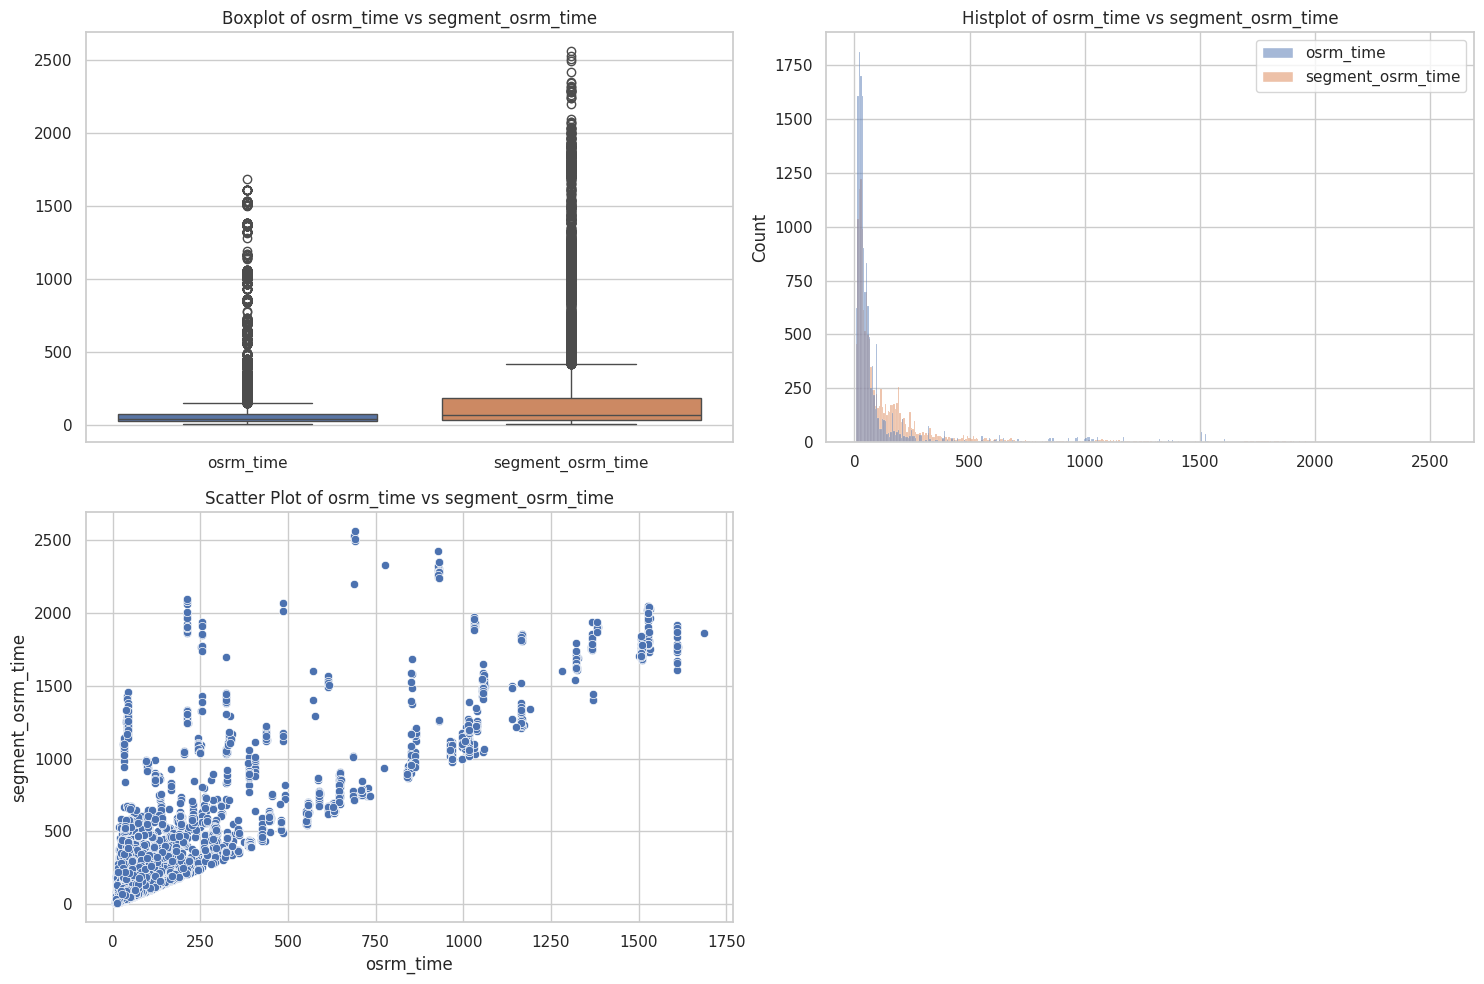

In [74]:
import matplotlib.pyplot as plt # "trip_uuid","osrm_time", "segment_osrm_time"
import seaborn as sns

fig = plt.figure(figsize=(15, 10))

# Boxplot
plt.subplot(2, 2, 1)
sns.boxplot(data=osrm_segment_osrm_time)
plt.title('Boxplot of osrm_time vs segment_osrm_time')

# Histogram
plt.subplot(2, 2, 2)
sns.histplot(data=osrm_segment_osrm_time)
plt.title("Histplot of osrm_time vs segment_osrm_time")

# Scatter Plot
plt.subplot(2, 2, 3)
sns.scatterplot(data=osrm_segment_osrm_time, x="osrm_time", y="segment_osrm_time")
plt.title("Scatter Plot of osrm_time vs segment_osrm_time")

# Display the plots
plt.tight_layout()
plt.show()

*   **Both variables, osrm_time, segment_osrm_time does not follow the assumptions of normality**.
*   **outliers are present in both variables**



In [75]:
#Levene’s Test for Homogeneity of Variances in osrm_time and segment_osrm_time

H0 = "The variances across the osrm_time and segment_osrm_time are equal." #Null Hypothesis
Ha = "The variances across the  osrm_time and segment_osrm_time are not equal." #Alternative Hypothesis

confidence = 0.95
alfa = 0.05

from scipy.stats import levene

statistic_value, p_value = levene(osrm_segment_osrm_time["osrm_time"], osrm_segment_osrm_time["segment_osrm_time"])
print(f"Levene's Test: Statistic = {statistic_value}, p-value = {p_value}")

if p_value <alfa:
 print(Ha)
else:
 print(H0)

Levene's Test: Statistic = 540.1857224759467, p-value = 1.983498152793614e-118
The variances across the  osrm_time and segment_osrm_time are not equal.


**Both variables, osrm_time and segment_osrm_time does not follow assumptions of normality and varience of homogeneity for t-test, hence we will perform perform non-paramatric Mann-Whitney U Test**

In [76]:
#hypothesis testing for osrm_time and segment_osrm_time
Ho = "Thesre is no difference between osrm_time and segment_osrm_time" # null hypothesis
Ha = "There is a difference between osrm_time and segment_osrm_time" #alternate hypothesis

confidence = 0.95
alfa = 0.05

from scipy.stats import mannwhitneyu
statistic_value,p_value=mannwhitneyu(osrm_segment_osrm_time["osrm_time"], osrm_segment_osrm_time["segment_osrm_time"], alternative='two-sided')
print("statistic :",statistic_value)
print("p_value :",p_value)
if p_value <alfa:
 print(Ha)
else:
 print(Ho)


statistic : 81360794.5
p_value : 0.0
There is a difference between osrm_time and segment_osrm_time


**Based on non paramatric Mann-Whitney U Test, osrm time and segment osrm time are not same.**

#**one-hot encoding of categorical variables**


In [77]:
#one-hot encoding for route type
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
new_df["route_type_encoded"] = label_encoder.fit_transform(new_df["route_type"])
new_df["data_type_encoded"] = label_encoder.fit_transform(new_df["data"])
new_df.head(5)


,trip_uuid,data,route_type,trip_creation_time,source_name,destination_name,od_total_time(mins),start_scan_to_end_scan,actual_distance_to_destination,actual_time,...,trip_creation_date,trip_creation_year,trip_creation_month,trip_completion_month,trip_creation_day,trip_creation_weekday,trip_end_weekday,trip_end_day,route_type_encoded,data_type_encoded
0,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),1000,999.0,5082.046634,830.0,...,2018-09-12,2018,9,9.0,12,Wednesday,Thursday,20.0,1,1
1,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),123,122.0,186.897974,96.0,...,2018-09-12,2018,9,9.0,12,Wednesday,Thursday,20.0,0,1
2,trip-153671043369099517,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),3100,3099.0,66437.911988,2736.0,...,2018-09-12,2018,9,9.0,12,Wednesday,Thursday,20.0,1,1
3,trip-153671046011330457,training,Carting,2018-09-12 00:01:00.113710,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),100,100.0,28.529648,59.0,...,2018-09-12,2018,9,9.0,12,Wednesday,Thursday,20.0,0,1
4,trip-153671052974046625,training,FTL,2018-09-12 00:02:09.740725,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),81,80.0,48.941666,63.0,...,2018-09-12,2018,9,9.0,12,Wednesday,Thursday,20.0,1,1


##**Normalization Standardization of the numerical features using MinMaxScaler or StandardScaler.**

In [78]:
new_df.columns


Index(['trip_uuid', 'data', 'route_type', 'trip_creation_time', 'source_name',
       'destination_name', 'od_total_time(mins)', 'start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'source_state', 'destination_state',
       'source_city', 'destination_city', 'trip_creation_date',
       'trip_creation_year', 'trip_creation_month', 'trip_completion_month',
       'trip_creation_day', 'trip_creation_weekday', 'trip_end_weekday',
       'trip_end_day', 'route_type_encoded', 'data_type_encoded'],
      dtype='object')

In [79]:
#MinMaxScaler
num_column_scale = ['od_total_time(mins)', 'start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
new_df[num_column_scale] = scaler.fit_transform(new_df[num_column_scale])
new_df.head(5)

,trip_uuid,data,route_type,trip_creation_time,source_name,destination_name,od_total_time(mins),start_scan_to_end_scan,actual_distance_to_destination,actual_time,...,trip_creation_date,trip_creation_year,trip_creation_month,trip_completion_month,trip_creation_day,trip_creation_weekday,trip_end_weekday,trip_end_day,route_type_encoded,data_type_encoded
0,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),0.124270,0.124270,0.059611,0.181517,...,2018-09-12,2018,9,9.0,12,Wednesday,Thursday,20.0,1,1
1,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),0.012947,0.012947,0.002090,0.019235,...,2018-09-12,2018,9,9.0,12,Wednesday,Thursday,20.0,0,1
2,trip-153671043369099517,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),0.390835,0.390835,0.780581,0.602918,...,2018-09-12,2018,9,9.0,12,Wednesday,Thursday,20.0,1,1
3,trip-153671046011330457,training,Carting,2018-09-12 00:01:00.113710,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),0.010028,0.010155,0.000229,0.011055,...,2018-09-12,2018,9,9.0,12,Wednesday,Thursday,20.0,0,1
4,trip-153671052974046625,training,FTL,2018-09-12 00:02:09.740725,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),0.007616,0.007616,0.000469,0.011939,...,2018-09-12,2018,9,9.0,12,Wednesday,Thursday,20.0,1,1


In [80]:
#StandardScaler
num_column_scale = ['od_total_time(mins)', 'start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_df[num_column_scale] = scaler.fit_transform(new_df[num_column_scale])
new_df.head(5)

,trip_uuid,data,route_type,trip_creation_time,source_name,destination_name,od_total_time(mins),start_scan_to_end_scan,actual_distance_to_destination,actual_time,...,trip_creation_date,trip_creation_year,trip_creation_month,trip_completion_month,trip_creation_day,trip_creation_weekday,trip_end_weekday,trip_end_day,route_type_encoded,data_type_encoded
0,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),1.323168,1.322180,0.438555,1.357536,...,2018-09-12,2018,9,9.0,12,Wednesday,Thursday,20.0,1,1
1,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),-0.429568,-0.430566,-0.193484,-0.296138,...,2018-09-12,2018,9,9.0,12,Wednesday,Thursday,20.0,0,1
2,trip-153671043369099517,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),5.520143,5.519178,8.360530,5.651681,...,2018-09-12,2018,9,9.0,12,Wednesday,Thursday,20.0,1,1
3,trip-153671046011330457,training,Carting,2018-09-12 00:01:00.113710,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),-0.475535,-0.474534,-0.213931,-0.379498,...,2018-09-12,2018,9,9.0,12,Wednesday,Thursday,20.0,0,1
4,trip-153671052974046625,training,FTL,2018-09-12 00:02:09.740725,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),-0.513508,-0.514506,-0.211296,-0.370486,...,2018-09-12,2018,9,9.0,12,Wednesday,Thursday,20.0,1,1


In [81]:
new_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       14787 non-null  object        
 1   data                            14787 non-null  category      
 2   route_type                      14787 non-null  category      
 3   trip_creation_time              14787 non-null  datetime64[ns]
 4   source_name                     14787 non-null  object        
 5   destination_name                14787 non-null  object        
 6   od_total_time(mins)             14787 non-null  float64       
 7   start_scan_to_end_scan          14787 non-null  float64       
 8   actual_distance_to_destination  14787 non-null  float64       
 9   actual_time                     14787 non-null  float64       
 10  osrm_time                       14787 non-null  float64       
 11  os

**Insights:**

*   Since data scientist team wants to create a  forecastingmodel, data set is already been devided into training(`72%) and test data(`28%)
*   Entire data is of 26 days

*   20 source name and 18 destination name is missing in data set. If drop those null values , it will lead to miscalculation for further analysis

*   Highest number of trip cretion is being done on wednesday and highest number of trip completion is being done on wednesday and saturday

*   Highest number of trip cretion and trip completion is being done during mid month and start decresing after that. Very low trip completion during 2nd week of month

*   Highest number of trips are created and completed in 9th month
*   60 % trips are made through carting route and 40% trips are made through FTL


*   Mumbai, Gurgaon and Bengaluru has done the more number of total trips(created and completed). Hence Maharashtra, Karnataka and Haryana has also done the more number of total trips.


*    od_total_time and start_scan_to_end_scan are statistically similar with 95% confidence.


*   With 95% confidence actual_time and OSRM_time are not similar. This will give a wrong information to customore about estimate delivery date.


*   With 95 % confidence actual_time and segment_actual_time are statistically different.



*   osrm_distance and segment_osrm_distance are statistically different with 95% confidence.

*   osrm_time and segment_osrm_time are also statistically different with 95% confidence.





---
**Recommandations:**


*    An open-source routing engine(OSRM) for time, distance, segment time and distance calculator needs to be optimized to reduced the error between computed data and actual data to give a nearly right estimated information about delevery package.
*   The reason for difference between actual_time and segment_actual_time can be due to the delivery person is not taking the predefine route or not starting the trip on time after scanning. Teams need to look into it.
*   Team should increase the number of delivery partenrs in mumbai, bengaluru and gurgaon during fetival seasons.
